<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/18_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import pandas as pd
import numpy as np

In [361]:
df = pd.read_csv('dataset.csv', sep =',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____  Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1)

In [362]:
print(f'Numero istanze: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero istanze: 7043
Numero colonne: 21


In [363]:
df.isnull().values.sum() #0 missing values

np.int64(0)

In [364]:
df['Churn'].value_counts() #il dataset non è bilanciato, il no ha 5174 istanze mentre il si 1869

,count
Churn,
No,5174
Yes,1869


Verificare se i clienti con contratto a lungo termine (Contract="Two year") hanno in media una spesa mensile (MonthlyCharges) inferiore rispetto a quelli con contratti mensili o annuali. (punti 2)

In [365]:
if ( df[df['Contract'] == "Two year"]["MonthlyCharges"].mean() > df[df['Contract'] != "Two year"]["MonthlyCharges"].mean()):
  print("two years contract have average MonthlyCharges  higher than the other")
else: print ("two years contract have average MonthlyCharges lower than the other")

two years contract have average MonthlyCharges lower than the other


Discretizzare tenure (anzianità del cliente) in 3 gruppi (bassa, media, alta). Creare una tabella pivot che mostri la percentuale di abbandono (Churn) per gruppo di anzianità e tipo di contratto. I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare? (punti 3)

In [366]:
labels = ['bassa','media','alta']
df['tenure_mapped'] = pd.cut(df['tenure'], bins=3, labels=labels)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_mapped
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,bassa
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,media
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,bassa
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,media
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,bassa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,bassa
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,alta
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,bassa
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,bassa


In [367]:
df['Churn_mapped'] = df['Churn'].map({'Yes': 1, 'No': 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_mapped,Churn_mapped
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,bassa,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,media,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,bassa,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,media,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,bassa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,bassa,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,alta,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,bassa,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,bassa,1


In [368]:
df.pivot_table(
    values='Churn_mapped',
    index='Contract',
    columns='tenure_mapped',
    aggfunc='mean'
)

/tmp/ipython-input-1004130620.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


tenure_mapped,bassa,media,alta
Contract,,,
Month-to-month,0.476748,0.329177,0.260234
One year,0.090343,0.106178,0.129338
Two year,0.000000,0.021898,0.033254


In [369]:
#I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare con probabilità del 47%

Determinare se l’adozione di almeno un servizio extra (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) riduce il tasso di abbandono. (punti 2) Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)

In [370]:
df['StreamingTV'].unique() #sembra che tutte abbiamo yes-no-nointernetservices

array(['No', 'Yes', 'No internet service'], dtype=object)

In [371]:
ser_ex_churn = df[(df['OnlineSecurity'] == 'Yes') | (df['OnlineBackup'] == 'Yes')
| (df['DeviceProtection'] == 'Yes') | (df['TechSupport'] == 'Yes')
| (df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')]['Churn_mapped'].mean()

no_ser_ex_churn = df[(df['OnlineSecurity'] != 'Yes') & (df['OnlineBackup'] != 'Yes')
& (df['DeviceProtection'] != 'Yes') & (df['TechSupport'] != 'Yes')
& (df['StreamingTV'] != 'Yes') & (df['StreamingMovies'] != 'Yes')]['Churn_mapped'].mean()

if ( ser_ex_churn < no_ser_ex_churn ): print("adottare un servizio extra riduce il tasso di abbandono")
else: print("adottare un servizio extra non riduce il tasso di abbandono")

adottare un servizio extra non riduce il tasso di abbandono


In [372]:
#un altra versione poteva essere quella di trasformare le colonne in numeriche
#for col in cols:
#  df[col] = df[col].map({'Yes' : 1, 'No' : 0, 'No internet service': 0} )
# e poi fare il confronto con gli un e 0 anzi che con yes e non yes

In [373]:
ser_ex_churn

np.float64(0.28897180762852404)

In [374]:
no_ser_ex_churn

np.float64(0.21406038756196485)

Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)

In [375]:
import matplotlib.pyplot as plt

In [376]:
ex_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['Num_service'] = (df[ex_service_cols] == 'Yes').sum(axis=1)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_mapped,Churn_mapped,Num_service
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,bassa,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,media,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,bassa,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,media,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,bassa,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.5,No,bassa,0,5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,alta,0,4
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,bassa,0,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,bassa,1,0


<Axes: xlabel='Num_service'>

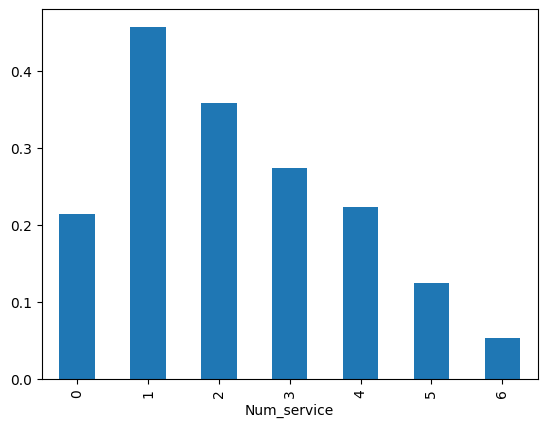

In [377]:
df.groupby('Num_service')['Churn_mapped'].mean().plot(kind='bar')

In [378]:
#si può vedere dal grafico che con l'adozione di 1 servizio extra il tasso di abbandono aumenta parecchio, per poi ridursi progressivamente

-------------------------------------------
PARTE 2
-------------------------------------------

Si vuole predire l’abbandono dei clienti (Churn). Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta) e istanze che contengono valori nulli, trasformare opportunamente valori categorici e dividere il dataset in 75% train e 25% test, preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori LogisticRegression, RandomForestClassifier e da un dummy classifier a scelta. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori di accuracy, F1 e della confusion matrix. (punti 4)


In [379]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier



In [380]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape #non ho ne valori neulli ne duplicati

(7043, 21)

In [381]:
#l'attributo customerID è inutile ai fini della previsione, dunque lo elimino
df.drop('customerID',axis = 1,inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [382]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [383]:
le = LabelEncoder()
for column in df:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.25, random_state=42, stratify=df['Churn'])

In [384]:
models = {'LogisticRegression': LogisticRegression(),
          'RandomForestClassifier': RandomForestClassifier(),
          'DummyClassifier': DummyClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")


for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 ===== LogisticRegression =====
accuracy on train 0.8055660734570238
accuracy on test 0.7995457126632595
F1 on train 0.5948717948717949
F1 on test 0.5782556750298686
confusion matrix on train 
 [[3501  379]
 [ 648  754]]
confusion matrix on test 
 [[1166  128]
 [ 225  242]]
 ===== RandomForestClassifier =====
accuracy on train 0.9979174555092768
accuracy on test 0.7915956842703009
F1 on train 0.9960728311317386
F1 on test 0.5474722564734895
confusion matrix on train 
 [[3876    4]
 [   7 1395]]
confusion matrix on test 
 [[1172  122]
 [ 245  222]]
 ===== DummyClassifier =====
accuracy on train 0.7345702385460053
accuracy on test 0.7348097671777399
F1 on train 0.0
F1 on test 0.0
confusion matrix on train 
 [[3880    0]
 [1402    0]]
confusion matrix on test 
 [[1294    0]
 [ 467    0]]


In [385]:
#osservando i risultati ottenuti possiamo notare che:
#il dummy classifier funziona male siccome assegna sempre alla prima classe l'output. l'f1 score infatti è molto basso (a 0), mentre l'accuracy è buona perchè il dataset è sblianciato
#per quanto riguarda  la logistic regression abbiamo dei buoni risultati di accuracy sia su train che su test. un f1 score medio e una confusion matrix che è coerente con il dataset
#il random forest ha un ottimo risultato sul train che si peggiora notevolmente sul test come osservabile anche dalla confusion matrix che indica che probabilmente sta overfittando

La predizione di RandomForestClassifier è influenzata dal genere? Valutare sui dati di test se la probabilità di abbandono calcolata sulle donne è la stessa per gli uomini (punti 2). Valutare se l’accuratezza di predizione ottenuta negli uomini è la stessa ottenuta nelle donne (punti 2). Eliminare l’attributo gender e valutare se l’accuratezza ottenuta negli uomini è la stessa ottenuta nelle donne (punti 1).

*suggerimenti della prof: come vedere se random forest influenzato dal genere? devo controllare come il modello si comporta sulle donne e sugli uomini quindi andare a contare, soltanto nel test, quante volte il modello predice che ci sarà un abbandono nelle donne e negli uomini. le 2 percentuali devono essere vicine -> se sono diverse potrebbe voler dire che il modello ha un bias sul genere.
per l'ultima parte del esercizio 2 ricordati di eliminarlo sia dal training che dal test->occorre riallenare il modello*

In [386]:
#considero le predizioni fatte dal random forest allenato prima
rf = models['RandomForestClassifier']
y_test_pred = rf.predict(X_test)

# Creiamo un mask per le donne e gli uomini nel test set
women_mask = X_test['gender'] == 0
men_mask   = X_test['gender'] == 1

# Probabilità di predizione di abbandono (percentuale di "1")
women_churn_rate = y_test_pred[women_mask].mean()
men_churn_rate   = y_test_pred[men_mask].mean()

print(f"Percentuale predetta di abbandono tra le donne: {women_churn_rate:.2f}")
print(f"Percentuale predetta di abbandono tra gli uomini: {men_churn_rate:.2f}")

# Accuracy separata per genere
women_acc = accuracy_score(y_test[women_mask], y_test_pred[women_mask])
men_acc   = accuracy_score(y_test[men_mask], y_test_pred[men_mask])

print(f"Accuracy per le donne: {women_acc:.2f}")
print(f"Accuracy per gli uomini: {men_acc:.2f}")

#si può notare che le percentuali predette sono vicine però per le donne l'accuracy è meno alta

Percentuale predetta di abbandono tra le donne: 0.19
Percentuale predetta di abbandono tra gli uomini: 0.20
Accuracy per le donne: 0.78
Accuracy per gli uomini: 0.80


In [387]:
#Rimuovere gender e riallenare
X_train_no_gender = X_train.drop('gender', axis=1)
X_test_no_gender  = X_test.drop('gender', axis=1)

rf_no_gender = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
rf_no_gender.fit(X_train_no_gender, y_train)
y_test_pred_no_gender = rf_no_gender.predict(X_test_no_gender)

# Accuracy separata senza gender
women_acc_no_gender = accuracy_score(y_test[women_mask], y_test_pred_no_gender[women_mask])
men_acc_no_gender   = accuracy_score(y_test[men_mask], y_test_pred_no_gender[men_mask])

print(f"Accuracy donne senza gender: {women_acc_no_gender:.2f}")
print(f"Accuracy uomini senza gender: {men_acc_no_gender:.2f}")

#eliminando l'attributo gender si può notare che le accuracy si allineano

Accuracy donne senza gender: 0.79
Accuracy uomini senza gender: 0.80


A partire dal dataset utilizzato al punto 1, trovare i migliori parametri di max_depth e n_estimators in RandomForestClassifier. Come cambia l'F1-score? (punti 2)

In [388]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape
df.drop('customerID',axis = 1,inplace = True)

parameters = {
    'max_depth': [2,5,8,10,15,20],
    'n_estimators':[10,20,50,100,250,200]
}
#devi specificare refit quando si calcolano due metriche insieme.
gd_dt = GridSearchCV(RandomForestClassifier(),
                     parameters,
                     scoring='f1',
                     cv=5,
                     refit='f1')
gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10, 15, 20],
                         'n_estimators': [10, 20, 50, 100, 250, 200]},
             refit='f1', scoring='f1')

In [389]:
best_par = gd_dt.best_params_
best_par

{'max_depth': 10, 'n_estimators': 100}

In [390]:
best_score = gd_dt.best_score_
best_score

np.float64(0.5727059385444182)

In [391]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"f1 on train {f1_score(y_train, y_train_pred_best)}")
print(f"f1 on test {f1_score(y_test, y_test_pred_best)}")

#si può osservare che l'f1 sul train si riduce, indca quindi che viene risolto il problema di overfitting
#e l'f1 sul test si alza

f1 on train 0.781441717791411
f1 on test 0.5700365408038977


A partire dal dataset originale, dopo aver applicato un Label Encoder alle feature categoriche, considerare le 5 feature più correlate (positivamente o negativamente) a Churn e verificare se la predizione di RandomForestClassifier migliora. (punti 3)

In [392]:
df = pd.read_csv('dataset.csv')

le = LabelEncoder()
for column in df:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])

correlation_matrix = df.corr() #Calcola la correlazione tra tutte le colonne numeriche del DataFrame df
#Seleziona le 5 feature più correlate positive e negatice con il target (price_range)
top_correlated_features = correlation_matrix['Churn'].abs().sort_values(ascending=False)[1:6].index.tolist()
new_df = df[['Churn'] + top_correlated_features]
new_df

,Churn,Contract,tenure,OnlineSecurity,TechSupport,OnlineBackup
0,0,0,1,0,0,2
1,0,1,34,2,0,0
2,1,0,2,2,0,2
3,0,1,45,2,2,0
4,1,0,2,0,0,0
...,...,...,...,...,...,...
7038,0,1,24,2,2,0
7039,0,1,72,0,0,2
7040,0,0,11,2,0,0
7041,1,0,4,0,0,0


In [393]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Churn', axis=1), new_df['Churn'], test_size=0.25, random_state=42)

models = {'RandomForestClassifier': RandomForestClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #osservando tutte le misure osservate, si può notare che la previsione migliora riducendo il problema dell'overfitting sul training


 ===== RandomForestClassifier =====
accuracy on train 0.8209011737978038
accuracy on test 0.7410562180579217
F1 on train 0.6413949962092494
F1 on test 0.5021834061135371
confusion matrix on train 
 [[3490  402]
 [ 544  846]]
confusion matrix on test 
 [[1075  207]
 [ 249  230]]


Creare una pipeline che, a partire dal dataset originale, discretizza MonthlyCharges in 5 gruppi, applica OneHotEncoder alle variabili categoriche e usa StandardScaler sulle variabili numeriche. Applicare il RandomForestClassifier con i valori migliori dei parametri analizzati nel punto 3 e confrontare i risultati. (punti 3)

In [394]:
df = pd.read_csv('dataset.csv',sep=',')
df = df.drop(columns=['customerID']) # Esempio di attributo inutile
df = df.dropna() #elimina valori nulli

In [395]:
# Sostituisci spazi con NaN e converti in numero dove possibile. Senza questo mi da errore nella fit perchè a quanto pare ci sono degli spazi nel dataset
df = df.replace(r'^\s*$', np.nan, regex=True).apply(pd.to_numeric, errors='ignore')
# Elimina tutte le righe con valori nulli
df = df.dropna()

/tmp/ipython-input-1100991446.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.replace(r'^\s*$', np.nan, regex=True).apply(pd.to_numeric, errors='ignore')


In [396]:
#trasformo il target in numerico perchè mi viene richiesto il calcolo del f1score, f1score vuole tutti i dati numerici. per il solo calcolo della accuracy non sarebbe necessario.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [397]:
X = df.drop('Churn', axis = 1) #elimino da ogni riga 'Churn' (il mio target,y), in x ho solo le features
y = df['Churn'] #y è il target, test set

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [399]:
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

In [400]:
numerical_cols.remove('MonthlyCharges')

In [401]:
coltran = ColumnTransformer(transformers=[
    #Discretizzazione: divide i valori continui in 5 bins, categorie
    ("dis", KBinsDiscretizer(n_bins=5), ["MonthlyCharges"]),
    #è uno strumento che trasforma le variabili categoriche (testo) in una serie di colonne numeriche composte solo da 0 e 1.
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    #Standardizzazione: porta la media a 0 e varianza a 1
    ("std", StandardScaler(), numerical_cols)],
                            remainder='passthrough')


In [402]:
pipeline = Pipeline(steps=[
    ("coltran",coltran),
    ("estimator", RandomForestClassifier(max_depth=10, n_estimators= 100,random_state=0))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dis', KBinsDiscretizer(),
                                                  ['MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('std', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'TotalCharges'])])),
                ('estimator',
                 RandomForestClassifier(max_depth=10, random_state=0))])

In [403]:
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.8009


In [404]:
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

F1-score: 0.5793


Aggiungere alla pipeline del punto 5 la funzione SelectKBest. Utilizzare la funzione di gridSearchCV per selezionare il K migliore e anche i valori migliori dei parametri max_depth e n_estimators di RandomForestClassifier (scegliere a piacere alcuni valori). (punti 3)

In [407]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_kbest = Pipeline(steps=[
    ('coltran', coltran),
    ('kbest', SelectKBest()),
    ('estimator', RandomForestClassifier())
])
pipeline_kbest

Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dis', KBinsDiscretizer(),
                                                  ['MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('std', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'TotalCharges'])])),
                ('kbest', SelectKBest()),
                ('estimator', RandomForestClassifier())])

In [408]:
parameters = {
    'kbest__k' : [3,5,7,"all"],
    'estimator__max_depth': [2,5,8,10,15,20],
    'estimator__n_estimators':[10,20,50,100,250,200]
}
gd = GridSearchCV(pipeline_kbest, parameters, scoring="accuracy", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)

print("Migliori parametri:", gd.best_params_)
best_pipeline = gd.best_estimator_

y_pred_gd_pl = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gd_pl)
print("Accuratezza del modello RandomForestClassifier con i migliori parametri e SelectKBest:", accuracy)

Migliori parametri: {'estimator__max_depth': 8, 'estimator__n_estimators': 20, 'kbest__k': 'all'}
Accuratezza del modello RandomForestClassifier con i migliori parametri e SelectKBest: 0.7923777019340159
